#                       KING COUNTY HOUSING PRICES #

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import validation_curve
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


Let’s import our data using pandas read_csv function.

In [2]:
#importing data
df = pd.read_csv('csv_files/kc_house_data.csv')

## EXPLORATORY DATA ANALYSIS ## 

Let's analyze the dataset and take a closer look at its content. The aim here is to find details like the number of columns and other metadata which will help us to gauge size and other properties such as the range of values in the columns of the dataset.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# Performing to_datetime function on the date column in order to convert it to 'datetime' object.
df['date'] = pd.to_datetime(df['date'])

The describe function returns descriptive statistics which summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. 

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## MISSING DATA

I will create a scatter matrix to see the relations between dependent and independent varibles.

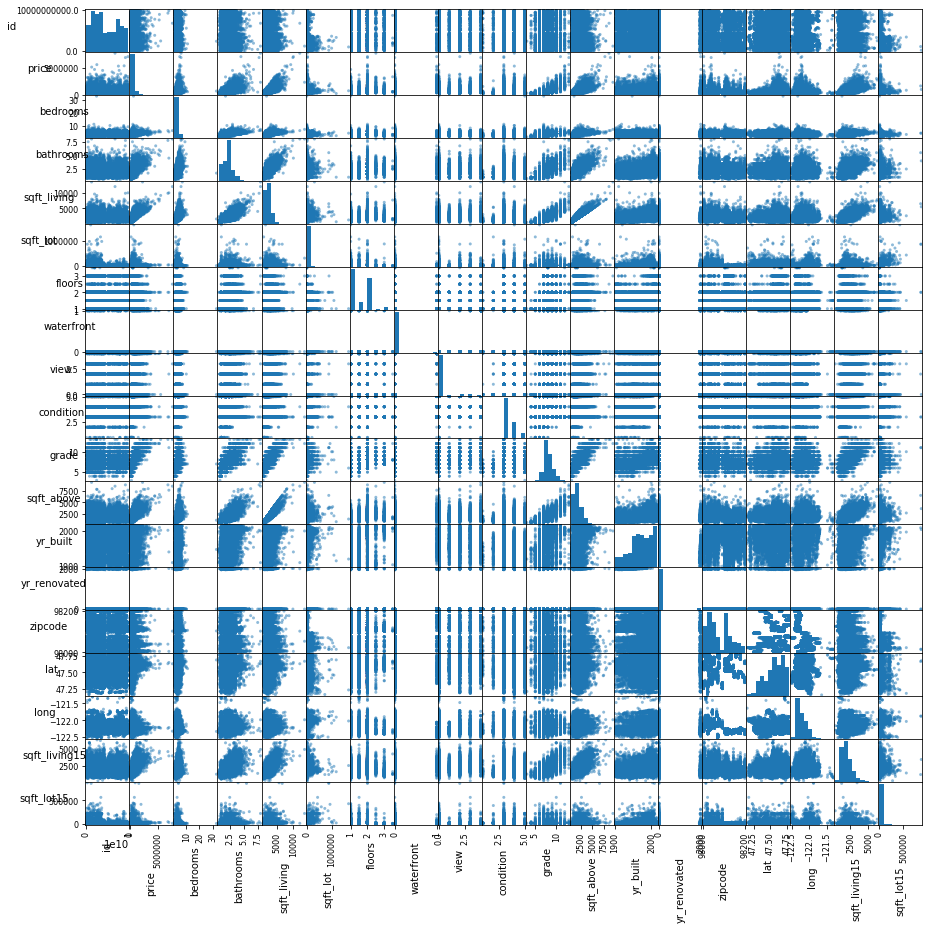

In [7]:
scatter_matrix = pd.plotting.scatter_matrix(df, figsize  = [15, 15])
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

### 1. DETECTING MISSING DATA

**.isna( )** function returns matrix of Boolean values where NaN data returns **True**.

In [8]:
df.isna().head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Checking to see which columns includes null values in the data set.

In [9]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Checking to see how many null values in each column in the data set.

In [10]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### 2. DEVELOPING STRATEGIES TO DEAL WITH MISSING VALUES

I will start with **yr_renovated** column. 0.18 is a high percentage to get rid of the data. Instead I will determine

In [11]:
print('Percentage of null yr_renovated column values:', len(df[df.yr_renovated.isna()])/len(df))
print('Number of unique yr_renovated column values:', df.yr_renovated.nunique())

Percentage of null yr_renovated column values: 0.17789507802009538
Number of unique yr_renovated column values: 70


In [12]:
# Checking the unique values in this column.
print(df.yr_renovated.unique())

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [13]:
# Creating a new column to transform the year of renovation information to a categorical 
# data which provides a the information of whether the house if renovated or not. 
df['renovated'] = df.yr_renovated.map(lambda x: 1 if x>0 else x)
#Replacing nan values with a place holder '?'
df.renovated.replace(np.nan, '?', inplace = True)
df.renovated.value_counts()
# Remove the 'yr_renovated' column 
df.drop('yr_renovated', axis=1, inplace=True)

In [14]:
df.renovated.value_counts(normalize=True)

0.0    0.787656
?      0.177895
1.0    0.034449
Name: renovated, dtype: float64

In [15]:
#Randomly select a class acccording to current distribution.
rel_prob = [.78, .034]
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_renovated(value):
    if value == '?':
        return np.random.choice([0,1], p=prob)
    else:
        return value
df.renovated = df.renovated.map(lambda x: impute_renovated(x))
df.renovated.value_counts(normalize=True)

0.0    0.958513
1.0    0.041487
Name: renovated, dtype: float64

In [16]:
df.renovated.astype(float).astype(str)

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: renovated, Length: 21597, dtype: object

Next, I will examine the **waterfront** column.

In [17]:
print(df.waterfront.unique())

[nan  0.  1.]


In [18]:
print('Percentage of null waterfront values:', len(df[df.waterfront.isna()])/len(df))
print('Number of unique waterfront column values:', df.waterfront.nunique())

Percentage of null waterfront values: 0.11001527989998611
Number of unique waterfront column values: 2


In [19]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
renovated               float64
dtype: object

In [20]:
# Changing waterfront column data type.
# df.waterfront = df.waterfront.astype(str)
# Replacing nan values with a place holder '?'
df.waterfront.replace(np.nan, '?', inplace = True)
df.waterfront.value_counts()

0.0    19075
?       2376
1.0      146
Name: waterfront, dtype: int64

In [21]:
df.waterfront.value_counts()

0.0    19075
?       2376
1.0      146
Name: waterfront, dtype: int64

In [22]:
df.waterfront.value_counts(normalize=True)

0.0    0.883225
?      0.110015
1.0    0.006760
Name: waterfront, dtype: float64

In [23]:
#Randomly select a class acccording to current distribution.
rel_prob = [.883, .006]
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_waterfront(value):
    if value == '?':
        return np.random.choice([0.0,1.0], p=prob)
    else:
        return value
df.waterfront = df.waterfront.map(lambda x: impute_waterfront(x))
df.waterfront.value_counts(normalize=True)

0.0    0.992545
1.0    0.007455
Name: waterfront, dtype: float64

In [24]:
df.waterfront = df.waterfront.astype(float)

In [25]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
renovated               float64
dtype: object

Because the number of null rows percentega is too low, I will drop these rows.

In [26]:
print('Percentage of null view values:', len(df[df.view.isna()])/len(df))
print('Number of unique view column values:', df.view.nunique())

Percentage of null view values: 0.0029170718155299346
Number of unique view column values: 5


In [27]:
df = df.dropna()

In [28]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

### 3. CHECKING THE DATA SET FOR PLACEHOLDERS

In [29]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
5430300171    0.000093
5083000375    0.000093
3395040550    0.000093
5101405604    0.000093
Name: id, dtype: float64 


date 
 2014-06-23    0.006594
2014-06-25    0.006083
2014-06-26    0.006083
2014-07-08    0.005898
2015-04-27    0.005758
Name: date, dtype: float64 


price 
 450000.0    0.007941
350000.0    0.007941
550000.0    0.007384
500000.0    0.007059
425000.0    0.006966
Name: price, dtype: float64 


bedrooms 
 3    0.454676
4    0.318798
2    0.127891
5    0.074115
6    0.012538
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249094
1.00    0.178369
1.75    0.140940
2.25    0.094595
2.00    0.089440
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006408
1400    0.006223
1440    0.006176
1010    0.005991
1800    0.005991
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016578
6000    0.013467
4000    0.011656
7200    0.010216
4800    0.005526
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494242
2.0    0.381304
1.

In [30]:
# Completing missing df_basement values and turning them into integer. 
# Basement value = living sq feet - above sq feet
df.sqft_basement = df.sqft_living - df.sqft_above
# Converting data type to float
df.sqft_basement = df.sqft_basement.astype(float)

### 4. CHECKING DUPLICATES

In [31]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0


#### _HOUSE PRICE ANALYSIS_ ####

Let's do a statistical analysis on the house sales price.

In [32]:
df.price.describe()

count    2.153400e+04
mean     5.400577e+05
std      3.660596e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [33]:
print('Minimum House Price:', df.price.min())
print('Maximum House Price:', df.price.max())
print('Mean House Price:', df.price.mean())
print('Median House Price:', df.price.median())

Minimum House Price: 78000.0
Maximum House Price: 7700000.0
Mean House Price: 540057.663833937
Median House Price: 450000.0


From the statistical analysis, we can see that price value has a range between 78,000 and 7,700,000. A histogram will help visualize the distribution of sales price.

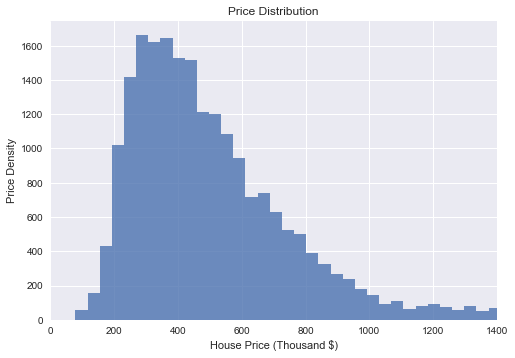

In [34]:
plt.style.use('seaborn')
plt.hist(df['price']/1000, bins=200, alpha = 0.8)
plt.xlabel('House Price (Thousand $)')
plt.ylabel('Price Density')
plt.title('Price Distribution')
plt.xlim(0,1400)
plt.show()

In [35]:
# h = df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
# sns.despine(left=True, bottom=True)
# [x.title.set_size(12) for x in h.ravel()];
# [x.yaxis.tick_left() for x in h.ravel()];

_Let's visualize if there is a trend between the sales and the month of the year._

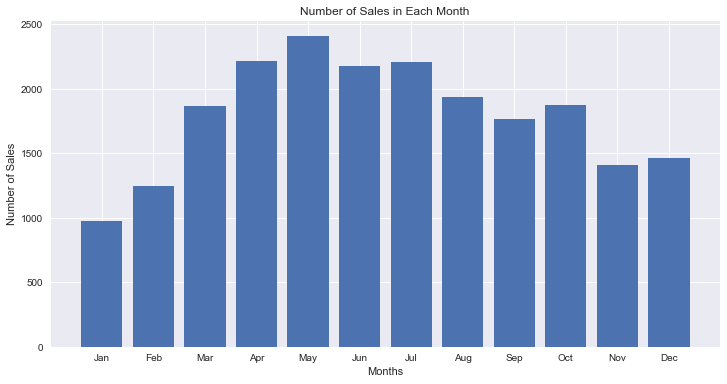

In [36]:
import datetime as dt
import calendar

df_month = df.copy()
df_month['month'] = df_month.date.dt.month

# Group sales by month
df_date = df_month.groupby('month', as_index=False).count()

# Plot transactions throughout a year
plt.figure(figsize=(12,6))
plt.bar(df_date['month'], df_date['id'])
plt.grid()
plt.xlabel('Months')
plt.ylabel('Number of Sales')
plt.title('Number of Sales in Each Month')
plt.xticks(np.arange(13), ('','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.grid()
plt.show()

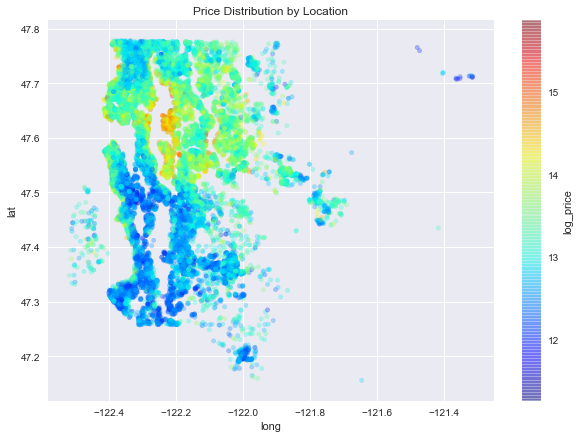

In [37]:
dfp = df.copy()
price = dfp.price
dfp['log_price']= np.log(price)

dfp.plot(kind="scatter", x="long", y="lat", title = 'Price Distribution by Location',alpha=0.3, figsize=(10,7),
    c="log_price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

Let's plot our data for the houses that are sold more than once.

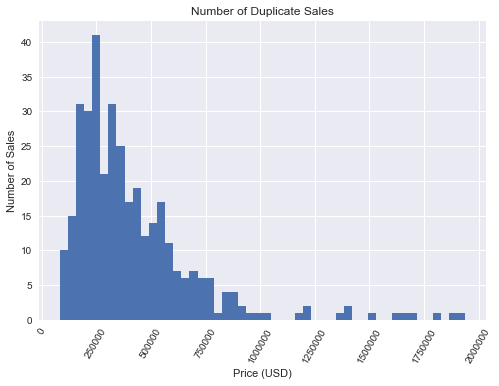

In [38]:
df_id = df.groupby('id', as_index=False).count()[['id','date']]
df_id = df_id[df_id['date']>1][['id']]
df_twice = df_id.merge(df, on='id', how='inner')
df_twice['price'].hist(bins=50)
plt.xticks(rotation=60)
plt.xlabel('Price (USD)')
plt.ylabel('Number of Sales')
plt.title('Number of Duplicate Sales')
plt.show()

In [39]:
duplicates = df[df.duplicated(subset = 'id')]
print('Number of the sales more than once:', len(duplicates))
duplicates[['id','price']]

Number of the sales more than once: 177


,id,price
94,6021501535,700000.0
314,4139480200,1400000.0
325,7520000520,240500.0
346,3969300030,239900.0
372,2231500030,530000.0
...,...,...
20165,7853400250,645000.0
20597,2724049222,220000.0
20654,8564860270,502000.0
20764,6300000226,380000.0


## DATA CLEANING

Let's analyze our data set in terms of statistical values and see outliers.

In [40]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.007430,0.233863,3.409724,7.657425,1788.557537,291.270317,1971.002275,98077.939352,47.560180,-122.213948,1986.299944,12751.079502,0.041516
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.085879,0.765686,0.650654,1.172643,827.745641,442.199825,29.376044,53.506639,0.138528,0.140735,685.121001,27255.483308,0.199484
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000,0.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


In [41]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

Let's check the outliers in our data and get rid of if necessary.

In [42]:
df.sort_values(by = ['bedrooms'], ascending = False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,98103,47.6878,-122.331,1330,4700,0.0
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,98106,47.5560,-122.363,1420,4960,1.0
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,98105,47.6635,-122.320,1810,3745,0.0
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,98006,47.5705,-122.175,2040,11914,0.0
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,98004,47.5861,-122.113,2730,10400,0.0


_33 bedrooms in 1620 sqft_licing space doesn't seem very likely. I will eliminate this row._

In [43]:
df.drop([15856], inplace = True)

In [44]:
df.sort_values(by = ['bathrooms'], ascending = True).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
12029,2991000160,2014-12-12,312500.0,4,0.50,2300,5570,2.0,0.0,0.0,...,8,2300,0.0,1996,98092,47.3285,-122.168,1820,6371,0.0
2259,3971701455,2014-10-03,273000.0,2,0.50,1180,7750,1.0,0.0,0.0,...,6,590,590.0,1945,98155,47.7690,-122.316,1380,8976,0.0
11662,7987400316,2014-08-14,255000.0,1,0.50,880,1642,1.0,0.0,0.0,...,6,500,380.0,1910,98126,47.5732,-122.372,1410,2992,0.0
10413,7129800036,2015-01-14,109000.0,2,0.50,580,6900,1.0,0.0,0.0,...,5,580,0.0,1941,98118,47.5135,-122.262,1570,5040,0.0
21596,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,98144,47.5941,-122.299,1020,1357,0.0


In [45]:
df.drop([12029,2259,11662,10413], inplace = True)

In [46]:
df.drop(columns = 'date', inplace = True)


Let's do a scatter plot for some of the columns we have to determine whether they involves outliers.

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


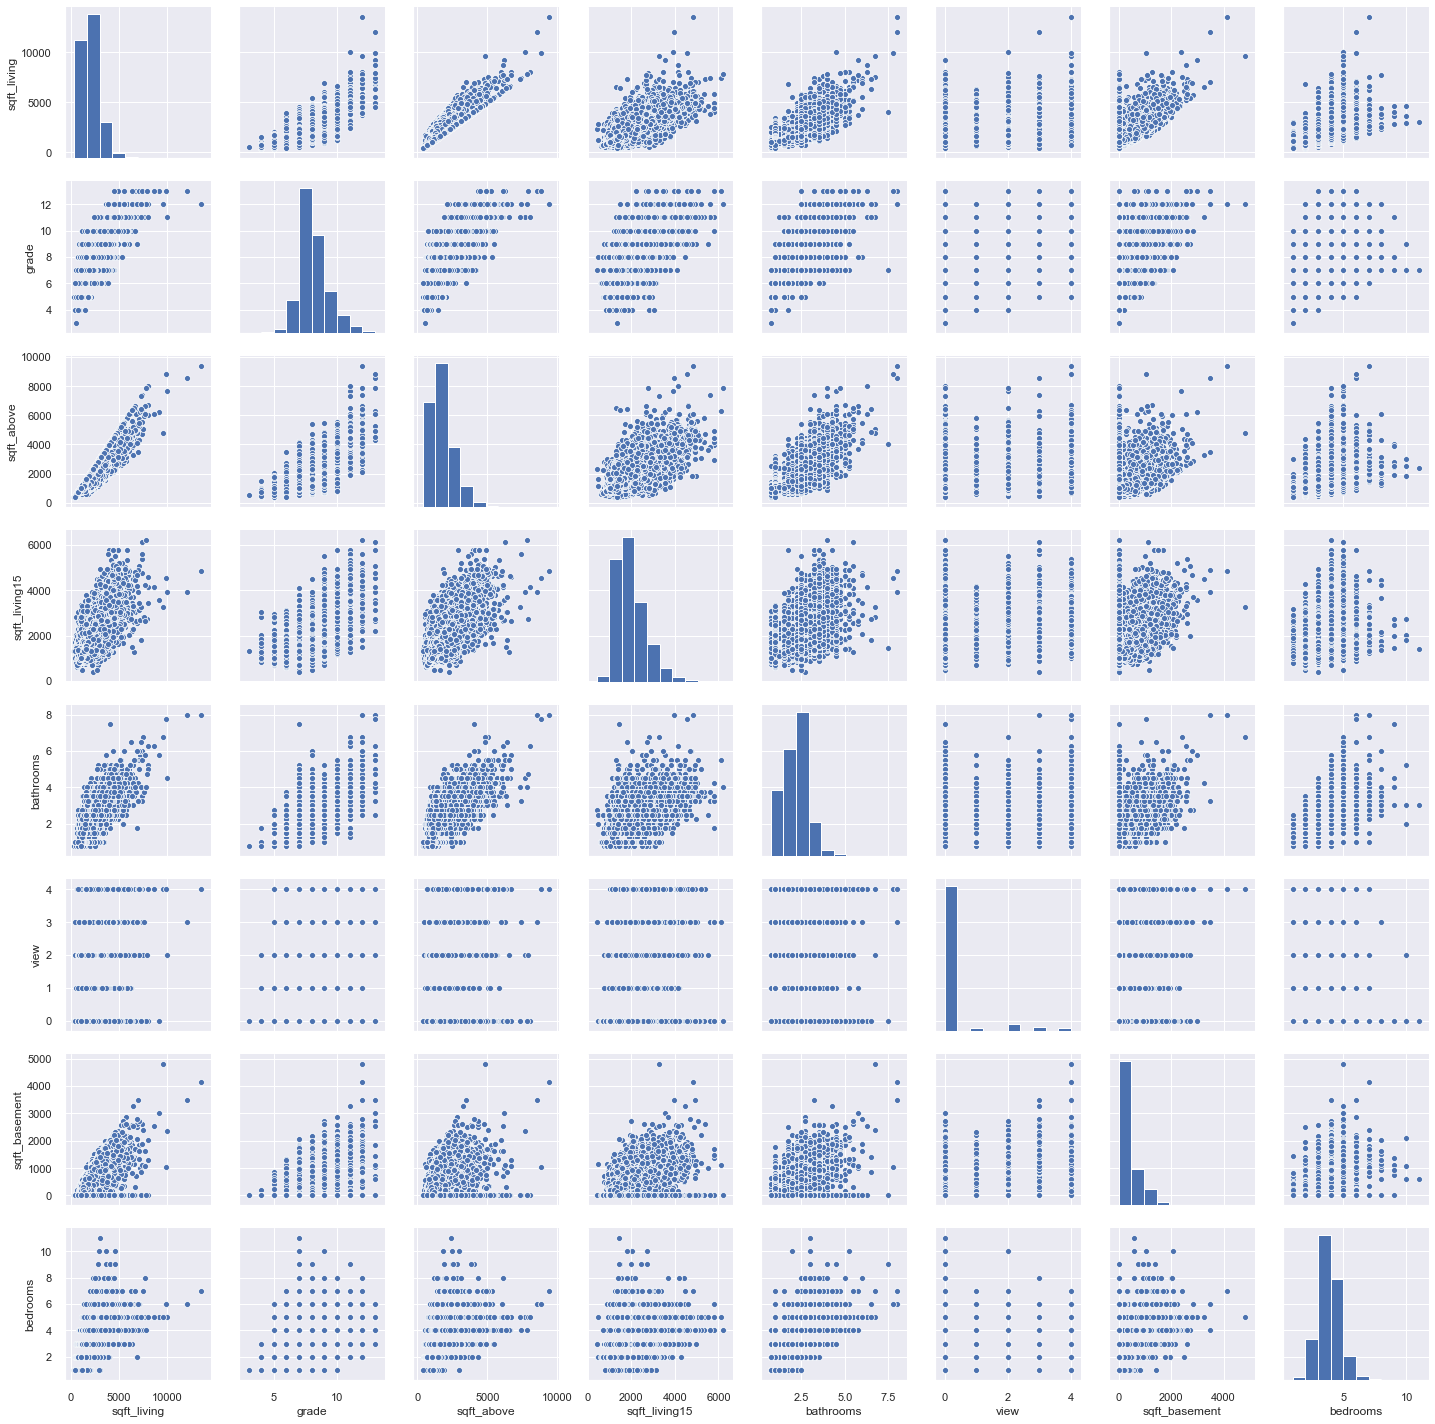

In [47]:
sns.set()
cols = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms', 
        'view', 'sqft_basement', 'bedrooms']
sns.pairplot(df[cols], size = 2.5)
plt.show();

## MODELING  

Let's analyze our data set in terms of statistical values.

In [48]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.152900e+04,2.152900e+04,21529.000000,21529.000000,21529.000000,2.152900e+04,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000
mean,4.582278e+09,5.401093e+05,3.371871,2.116030,2080.006178,1.509281e+04,1.494194,0.007432,0.233917,3.409680,7.657717,1788.740211,291.265967,1971.007664,98077.929862,47.560176,-122.213931,1986.412420,12752.736634,0.041525
std,2.876905e+09,3.660767e+05,0.903994,0.768372,917.432575,4.138475e+04,0.539815,0.085889,0.765767,0.650609,1.172519,827.690802,442.232785,29.374317,53.508216,0.138525,0.140742,685.155417,27258.414326,0.199507
min,1.000102e+06,7.800000e+04,1.000000,0.750000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000,0.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10084.000000,0.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


Now, see the correlation between our dependent varible **price** and independent variables.

In [49]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701571
grade            0.668294
sqft_above       0.605692
sqft_living15    0.585294
bathrooms        0.524991
view             0.395722
sqft_basement    0.321819
bedrooms         0.315135
lat              0.307909
floors           0.257020
waterfront       0.246251
renovated        0.105660
sqft_lot         0.090312
sqft_lot15       0.083160
yr_built         0.054160
condition        0.035326
long             0.022356
id              -0.017317
zipcode         -0.053504
Name: price, dtype: float64

From the correlation out, we can see that out **sqft_living** is highly correlated with our target value.

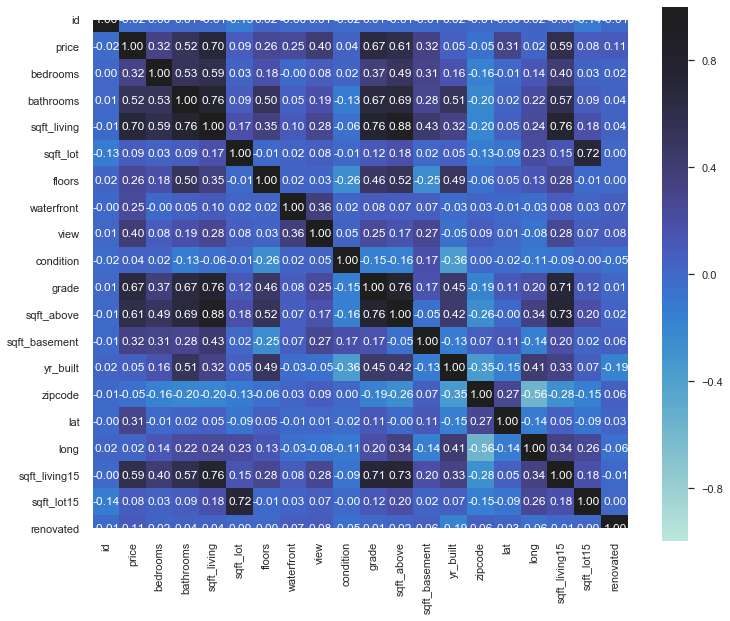

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmax=1.0, vmin=-1.0, square=True, fmt='.2f',
            annot=True, cbar_kws={"shrink": .82}, center = 1.0,  
            yticklabels=df.columns.values, xticklabels=df.columns.values)
plt.show()

The correlation matrix above shows the strenght of the correlation between two value from our data set. As seen, every column is 100% correlated with itself and its correlation value is 1. Highly correlated values would not be optimal for our regression model.


### 1. REGRESSION MODEL WITH ONE INDEPENDENT VARIABLE

As we see above, there is a high correlation between **price** and **sqft_living**. I will apply a simple regression model between these two variables. First, I will start with creating a data set with these two variables.

In [51]:
df0 = df.copy()
df0 = df0[['price', 'sqft_living']]

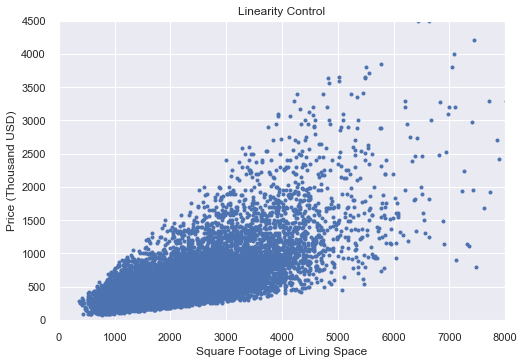

In [52]:
plt.scatter(df0['sqft_living'], df0['price']/1000, cmap='Blues', marker = '.')
plt.xlim(0,8000)
plt.ylim(0,4500)
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price (Thousand USD)')
plt.title("Linearity Control")
plt.show()

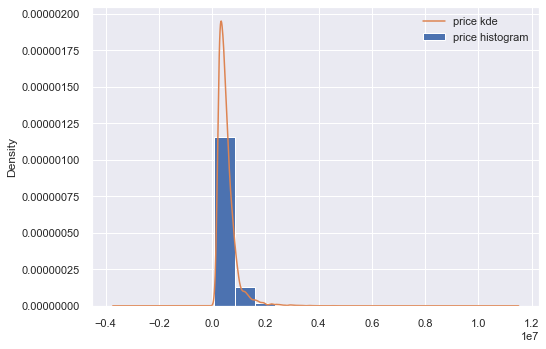

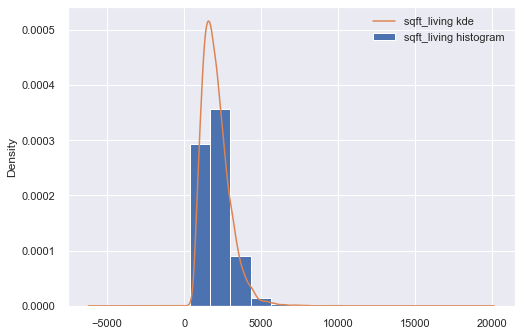

In [53]:
# df0.sqft_living.plot.hist(density = True, label = 'Square Footage')
# df0.sqft_living.plot.kde(label = 'Square Footage KDE')
# plt.legend()
# plt.show()

for column in df0:
    df0[column].plot.hist(density = True, label = column +' histogram')
    df0[column].plot.kde(label = column +' kde')
    plt.legend()
    plt.show()

Let's run OLS test and see the values our model.

In [54]:
f0 = 'price~sqft_living'
model0 = ols(formula=f0, data=df0).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:24:54   Log-Likelihood:            -2.9905e+05
No. Observations:               21529   AIC:                         5.981e+05
Df Residuals:                   21527   BIC:                         5.981e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.217e+04   4405.707     -9.573      0.000   -5.08e+04   -3.35e+04
sqft_living   279.9431      1.938    144.450      0.000     276.145     283.742
==============================================================================
Omnibus:                    14578.239   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           515887.513
Skew:                           2.780   Prob(JB):                         0.00
Kurtosis:                      26.328   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's draw a prediction line with data points on a scatter plot for X(sqft_living) and Y (Price) We can use the model.predict() function to predict the start and end point of oou regression line for the minimum and maximum values in the 'sqft_living' variable.



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


New DataFrame:
    sqft_living
0          370
1        13540
Prediction:
 0    6.140480e+04
1    3.748256e+06
dtype: float64


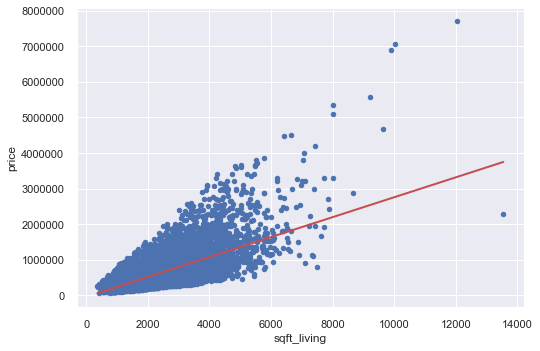

In [55]:
# Firts, create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'sqft_living': [df0.sqft_living.min(), df0.sqft_living.max()]})
print('New DataFrame:\n', X_new.head())

# make predictions for those x values and store them
preds = model0.predict(X_new)
print ('Prediction:\n', preds)

# first, plot the observed data and the least squares line
df0.plot(kind='scatter', x= 'sqft_living', y='price')
plt.plot(X_new, preds, c='r', linewidth=2)
plt.show()

Below, we visualize the error term for variance and heteroscedasticity. As seen, there is a positive distribution with residuals and sqft_living which indicates it is not normally distributed.

<function matplotlib.pyplot.show(*args, **kw)>

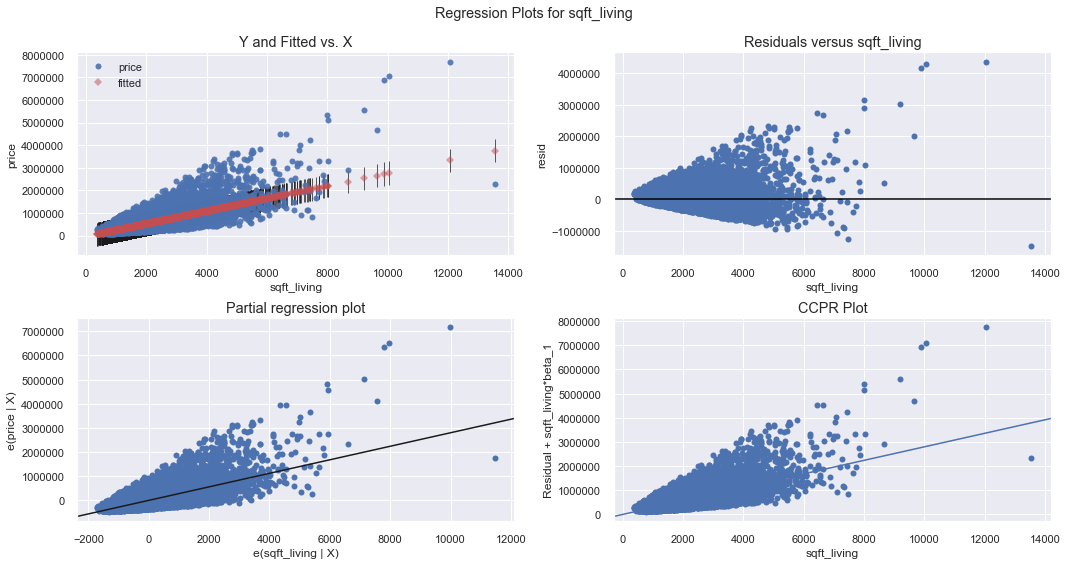

In [56]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model0, 'sqft_living', fig = fig)
plt.show

We check the normality assumptions by creating a Q-Q-Plot.

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


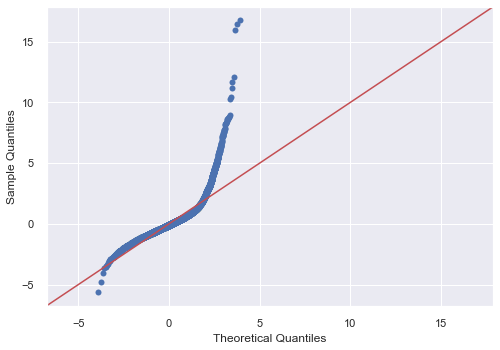

In [57]:
import scipy.stats as stats
residuals = model0.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

#### _LOG TRANSFORMATION_

As seen in the QQ-Plot, our regression model is not the best fit. We apply log transformation in order to increase fitting. 

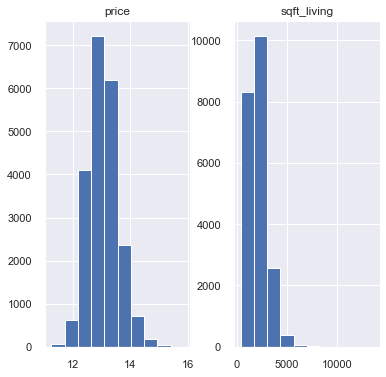

In [58]:
df0_log= df0.copy()
df0_log["price"] = np.log(df0["price"])
df0_log.hist(figsize  = [6, 6]);

# df0_log= df0.copy()
# df0_log = np.log(df0)
# df0_log.hist(figsize  = [6, 6]);

In [59]:
f0_log = 'price~sqft_living'
model0_log = ols(formula=f0_log, data=df0_log).fit()
model0_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.009e+04
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:24:58   Log-Likelihood:                -9631.3
No. Observations:               21529   AIC:                         1.927e+04
Df Residuals:                   21527   BIC:                         1.928e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2193      0.006   1911.553      0.000      12.207      12.232
sqft_living     0.0004   2.81e-06    141.723      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.698   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.720
Skew:                           0.029   Prob(JB):                        0.156
Kurtosis:                       2.974   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<function matplotlib.pyplot.show(*args, **kw)>

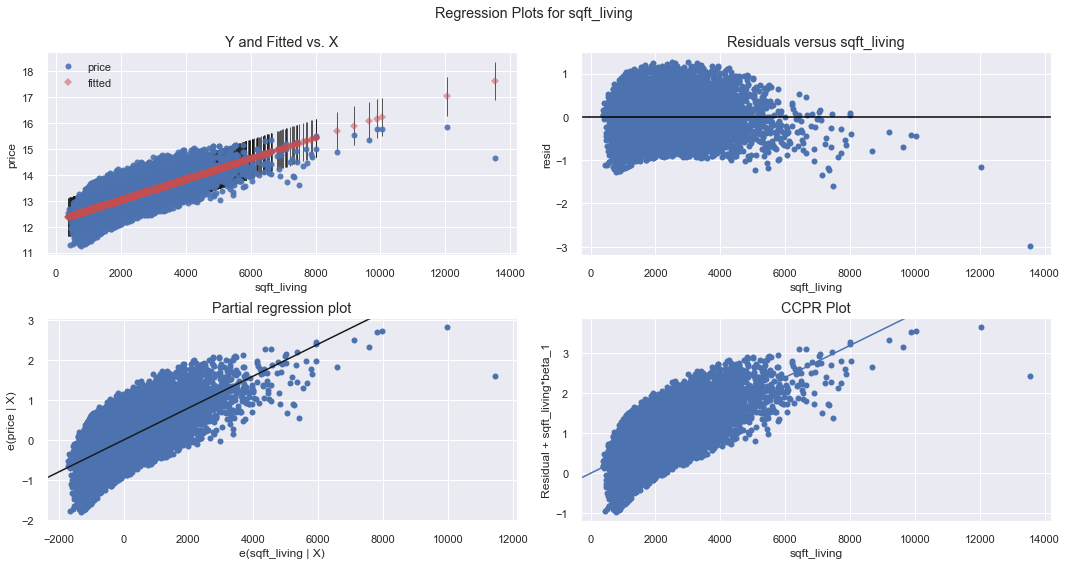

In [60]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model0_log, 'sqft_living', fig = fig)
plt.show

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


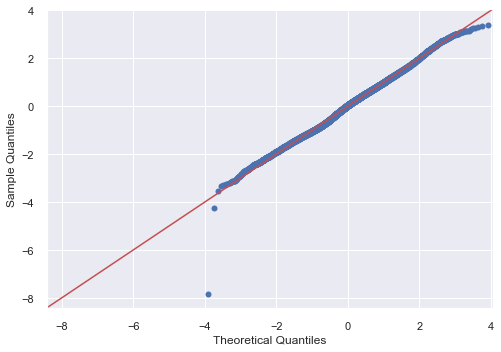

In [61]:
residuals_log = model0_log.resid
fig = sm.graphics.qqplot(residuals_log, dist=stats.norm, line='45', fit=True)
fig.show()

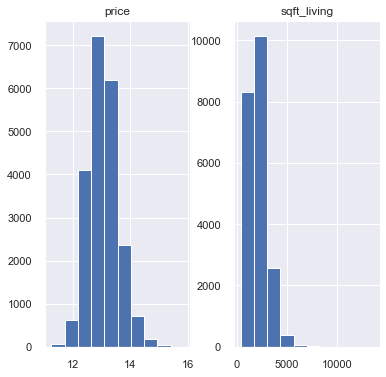

In [62]:
df0_log= df0.copy()

df0_log["price"] = np.log(df0["price"])
df0_log.hist(figsize  = [6, 6]);

In [64]:
df0_new = df0_log.copy()
df0_new['price'] = np.exp(df0_log.price)

### 2. REGRESSION MODEL WITH MULTIPLE INDEPENDENT VARIABLE

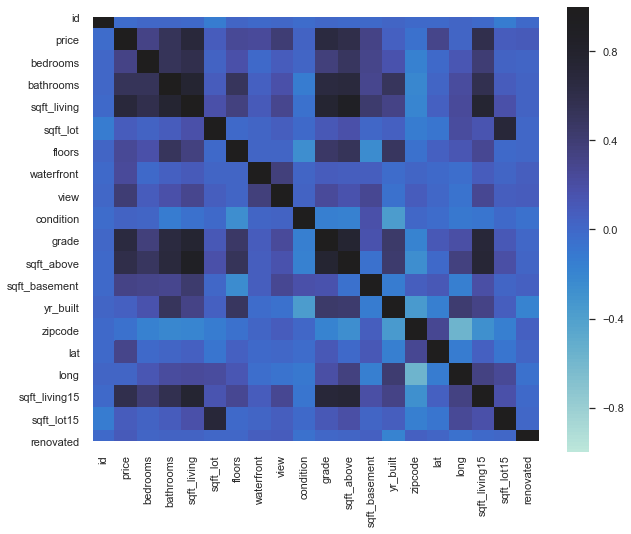

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmax = 1.0, vmin = -1.0, square = True, fmt = '.2f',
            cbar_kws={"shrink": .82}, center = 1.0,  
            yticklabels=df.columns.values, xticklabels=df.columns.values)
plt.show()

In [66]:
abs(df.corr()) > 0.7

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [67]:
df1 = df.copy()

In [68]:
df1 = df1[['price','sqft_living', 'view', 'sqft_basement', 'bedrooms']]
df1.head()

,price,sqft_living,view,sqft_basement,bedrooms
0,221900.0,1180,0.0,0.0,3
1,538000.0,2570,0.0,400.0,3
2,180000.0,770,0.0,0.0,2
3,604000.0,1960,0.0,910.0,4
4,510000.0,1680,0.0,0.0,3


In [69]:
df1.describe()

,price,sqft_living,view,sqft_basement,bedrooms
count,2.152900e+04,21529.000000,21529.000000,21529.000000,21529.000000
mean,5.401093e+05,2080.006178,0.233917,291.265967,3.371871
std,3.660767e+05,917.432575,0.765767,442.232785,0.903994
min,7.800000e+04,370.000000,0.000000,0.000000,1.000000
25%,3.220000e+05,1430.000000,0.000000,0.000000,3.000000
50%,4.500000e+05,1910.000000,0.000000,0.000000,3.000000
75%,6.450000e+05,2550.000000,0.000000,560.000000,4.000000
max,7.700000e+06,13540.000000,4.000000,4820.000000,11.000000


In [70]:
abs(df1.corr()) > 0.72

,price,sqft_living,view,sqft_basement,bedrooms
price,True,False,False,False,False
sqft_living,False,True,False,False,False
view,False,False,True,False,False
sqft_basement,False,False,False,True,False
bedrooms,False,False,False,False,True


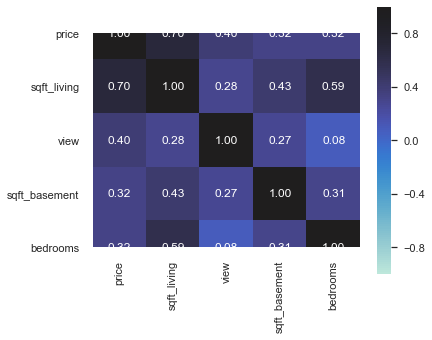

In [71]:
plt.figure(figsize=(6,6))
sns.heatmap(df1.corr(), vmax = 1.0, vmin = -1.0, square = True, fmt = '.2f',
            annot = True, cbar_kws={"shrink": .82}, center = 1.0,  
            yticklabels=df1.columns.values, xticklabels=df1.columns.values)
plt.show()

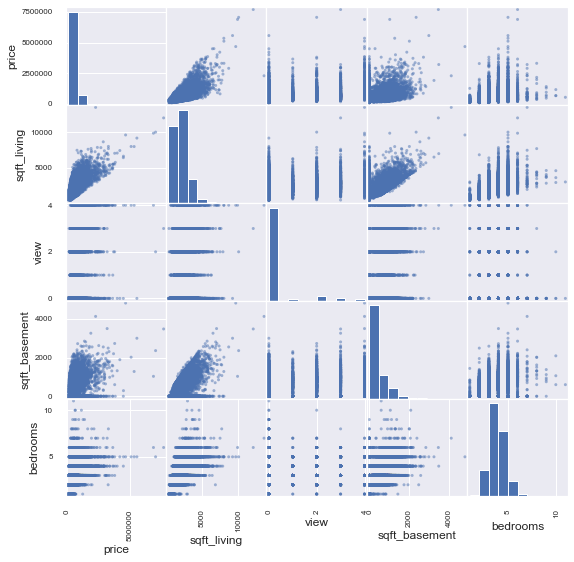

In [72]:
pd.plotting.scatter_matrix(df1,figsize  = [9, 9]);

### _Step by Step Multiple Linear Regression_

#### _1. Plotting Histograms with KDE:_

In order to check predictors' distribution, we plot histograms with KDE overlay. If the plot is skewed, it is an abnormal distribution.

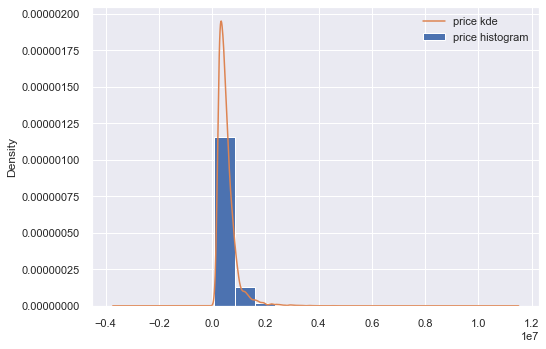

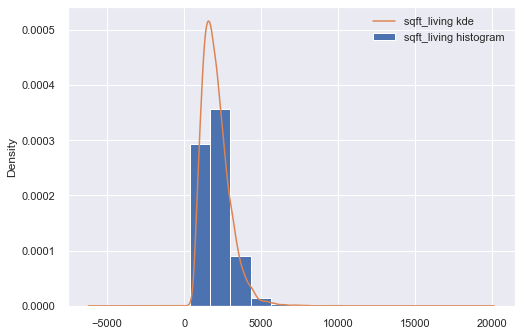

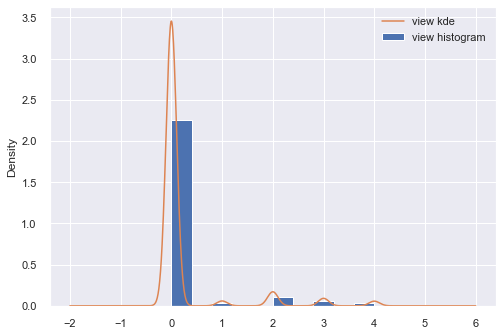

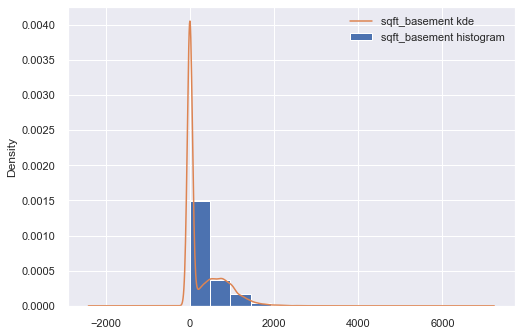

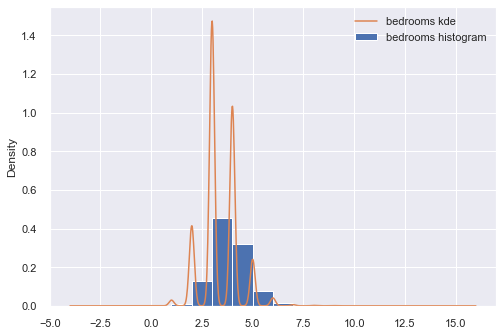

In [73]:
for column in df1:
    df1[column].plot.hist(density=True, label = column+' histogram')
    df1[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()    

**view** and **bedrooms** seems pretty normal. We observe major skew in the **sqft_basement** and **sqft_living** predictors and our target value **price** which could be problematic towards analysis. 

#### _2. Scatter Plots ~ Predicter Variable vs Target Variable:_

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

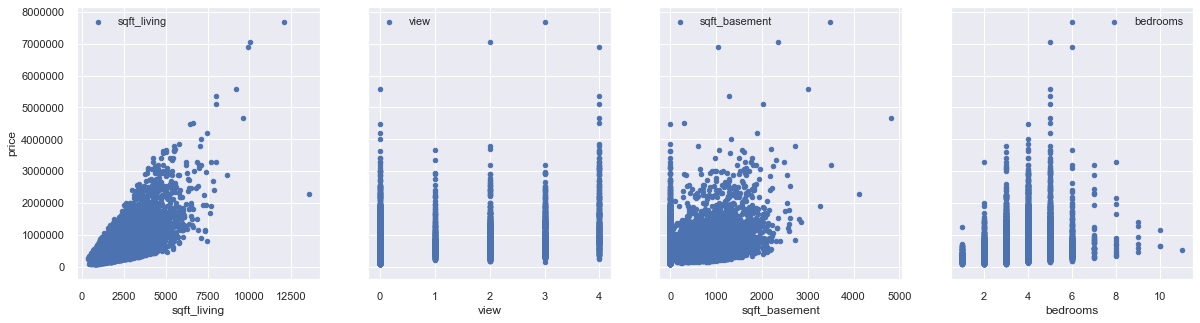

In [74]:
fig, axs = plt.subplots(1, 4, sharey = True, figsize = (20,5))
for idx, channel in enumerate(['sqft_living', 'view', 'sqft_basement', 'bedrooms']):
    df.plot(kind = 'scatter', x = channel, y = 'price', ax = axs[idx], label = channel)
plt.legend()
plt.show()


#### _3. Regression Diagnostics with Statsmodel :_

In [75]:
outcome = 'price'
x_cols = ['sqft_living', 'view', 'sqft_basement', 'bedrooms']
predictors1 = '+'.join(x_cols)
formula1 = outcome + "~" + predictors1
model1 = ols(formula=formula1, data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     6451.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:00:35   Log-Likelihood:            -2.9787e+05
No. Observations:               21529   AIC:                         5.957e+05
Df Residuals:                   21524   BIC:                         5.958e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.309e+04   6572.101     14.165      0.000    8.02e+04    1.06e+05
sqft_living     288.6100      2.475    116.630      0.000     283.760     293.460
view           9.758e+04   2346.162     41.593      0.000     9.3e+04    1.02e+05
sqft_basement    -7.3523      4.309     -1.706      0.088     -15.799       1.094
bedrooms       -5.16e+04   2336.124    -22.087      0.000   -5.62e+04    -4.7e+04
==============================================================================
Omnibus:                    13598.668   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           474586.388
Skew:                           2.506   Prob(JB):                         0.00
Kurtosis:                      25.448   Cond. No.                     9.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### _4. Draw A Prediction Line:_
Draw prediction line with data point on a scatter plot for X(view) and Y(price).

In [77]:
# Firts, create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'sqft_living': [df1.sqft_living.min(), df0.sqft_living.max()]})
print('New DataFrame:\n', X_new.head())

# make predictions for those x values and store them
preds = model1.predict(X_new)
print ('Prediction:\n', preds)

# first, plot the observed data and the least squares line
df1.plot(kind='scatter', x = 'sqft_living', y = 'price')
plt.plot(X_new, preds, c='r', linewidth=2)
plt.show()

New DataFrame:
    sqft_living
0          370
1        13540


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'view' is not defined
    price~sqft_living+view+sqft_basement+bedrooms
                      ^^^^

In [ ]:
f = 'price~sqft_living'
model = ols(formula=f, data=df1).fit()
model.summary()

#### _5. Visualize The Error Term:_

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model0_log, 'sqft_living', fig = fig)
plt.show

#### _6. QQ-Plot:_

In [ ]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

##### _for 'view' column"_

In [ ]:
# Code for model, prediction line plot, heteroscedasticity check and QQ normality check here
f_view = 'price~view'
model_view = smf.ols(formula=f_view, data=df1).fit()
print ('R-Squared:',model_view.rsquared)
print (model_view.params)
X_new = pd.DataFrame({'view': [df1.view.min(), df1.view.max()]});
preds = model_view.predict(X_new)
df1.plot(kind='scatter', x='view', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_view, "view", fig=fig)
plt.show()
import scipy.stats as stats
residuals = model_view.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)




#### _7. Log Transformation:_

In [ ]:
df1[['sqft_living', 'view', 'sqft_basement', 'bedrooms']].hist(figsize  = [6,6]);

In [ ]:
df1.sqft_basement.replace(0, 0.0000001, inplace = True)
df1.view.replace(0, 0.0000000001, inplace = True)

In [ ]:
df1_log = df1.copy()
non_normal = ['sqft_living', 'view']
df1_log.price = np.log(df1_log.price)
for feat in non_normal:
     df1_log[feat] = df1_log[feat].map(lambda x: np.log(x))
        
df1_log[['sqft_living', 'view', 'sqft_basement', 'bedrooms']].hist(figsize  = [6,6]);


In [ ]:
outcome_log = 'price'
x_cols_log = ['sqft_living', 'view', 'sqft_basement', 'bedrooms']
predictors_log = '+'.join(x_cols_log)
formula_log = outcome_log + "~" + predictors_log
model_log = ols(formula=formula_log, data=df1_log).fit()
model_log.summary()

In [ ]:
df1_log[['sqft_living', 'view', 'sqft_basement', 'bedrooms']].hist(figsize  = [6,6]);

#### _8. Scaling:_

In [ ]:
'sqft_living', 'view', 'sqft_basement', 'bedrooms'

logliv = df1_log['sqft_living']
logview = df1_log['view']
logbase = df1_log['sqft_basement']
logbed = df1_log['bedrooms']
logprice = df1_log['price']


scaled_living = (logliv-np.mean(logliv))/(max(logliv)-min(logliv)) #mean normalization
scaled_view = (logview-min(logview))/(max(logview)-min(logview)) #min-max scaling
scaled_basement = (logbase-np.mean(logbase))/(max(logbase)-min(logbase)) #mean normalization
scaled_bed = (logbed-np.mean(logbed))/np.sqrt(np.var(logbed)) #standardization
scaled_price= (logprice-np.mean(logprice))/np.sqrt(np.var(logprice)) #standardization

df1_scaled = pd.DataFrame([])
df1_scaled["sqft_living"] = scaled_living
df1_scaled["view"]= scaled_view
df1_scaled["sqft_basement"] = scaled_basement
df1_scaled["bedrooms"]= scaled_bed
df1_scaled["price"] = scaled_price

In [ ]:
print(df1.head(2), '\n')
print(df1_log.head(2), '\n')
print(df1_scaled.head(2), '\n')

In [ ]:
df1_fin = pd.DataFrame([])
df1_fin["sqft_living"] = scaled_living
df1_fin["view"] = scaled_view
df1_fin["sqft_basement"]= scaled_basement
df1_fin["bedrooms"]= scaled_bed

price = df1_log['price']
df1_fin = pd.concat([price, df1_fin], axis=1)
df1_fin.head()

In [ ]:
df1_fin.info()

In [ ]:
df1_ols = pd.concat([price, scaled_living, scaled_view, scaled_basement, scaled_bed], axis= 1)
df1_ols.head()

In [ ]:
formula = "price ~ sqft_living + view + sqft_living + bedrooms "
model = ols(formula= formula, data=df1_ols).fit()

outcome = 'price'
predictors = df1_ols.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data=df1_ols).fit()
model.summary()

### _Conclusion_

Our R-Square value hasn't improved. We need to chose better independent variables to determine a better fit.